In [1]:
import pandas as pd
import os
from os.path import isfile, join, isdir, exists
from tqdm import tqdm
from utils import *
#import seaborn as sns
#import seaborn.objects as so
#import matplotlib.pyplot as plt

# Exploratory Data Analysis

In [3]:
def preprocess_metadata_sheets(path):
    df = pd.read_csv(path, sep='\t', skiprows=[1,2,3,4]).fillna('').replace('Not Provided', '').replace('Not provided', '').replace('not provided', '').replace('Not specified', '').replace('Not Specified', '').replace('no specified', '')
    columns = list(df.columns)
    if 'Field' in columns:
        columns.remove('Field')
    return df[columns]

def get_counts(df):
    counts = pd.DataFrame(df[df == ''].count()).transpose()
    counts['total_rows'] = df.shape[0]
    return counts

def read_metadata(provider_path):
    model_validation = preprocess_metadata_sheets(provider_path+'_metadata-model_validation.tsv')
    if exists(provider_path+'_metadata-pdx_model.tsv'):
        pdx_model = preprocess_metadata_sheets(provider_path+'_metadata-pdx_model.tsv')
    else:
        pdx_model= pd.DataFrame()
    if exists(provider_path+'_metadata-cell_model.tsv'):
        cell_model = preprocess_metadata_sheets(provider_path+'_metadata-cell_model.tsv')
    else:
        cell_model = pd.DataFrame()
    patient = preprocess_metadata_sheets(provider_path+'_metadata-patient.tsv')
    sharing = preprocess_metadata_sheets(provider_path+'_metadata-sharing.tsv')
    patient_sample = preprocess_metadata_sheets(provider_path+'_metadata-patient_sample.tsv')
    return [model_validation, pdx_model, cell_model, patient, patient_sample, sharing]

def main(data_dir):
    mv_counts, pdx_counts, cell_counts = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
    pat_counts, pat_sam_counts, share_counts = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
    providers = list(os.listdir(data_dir))
    providers.remove('.DS_Store')
    providers.sort()
    provider_counts = pd.DataFrame(columns=['provider', 'mv_counts','pdx_counts','cell_counts','patient_counts','patient_sample_counts','sharing_counts'])
    provider_counts['provider'] = providers
    for i in tqdm(range(len(providers))):
        provider = providers[i]
        dfs = read_metadata(join(data_dir, provider, provider))
        mv_counts = mv_counts.append(get_counts(dfs[0])).reset_index(drop=True).fillna('0').astype(float)
        pdx_counts = pdx_counts.append(get_counts(dfs[1])).reset_index(drop=True).fillna('0').astype(float)
        cell_counts = cell_counts.append(get_counts(dfs[2])).reset_index(drop=True).fillna('0').astype(float)
        pat_counts = pat_counts.append(get_counts(dfs[3])).reset_index(drop=True).fillna('0').astype(float)
        pat_sam_counts = pat_sam_counts.append(get_counts(dfs[4])).reset_index(drop=True).fillna('0').astype(float)
        share_counts = share_counts.append(get_counts(dfs[5])).reset_index(drop=True).fillna('0').astype(float)
        #provider_counts.iloc[i, 0] = provider
        #for j in range(len(dfs)):
        #    provider_counts.iloc[i, j+1] = [get_counts(dfs[j])]
    mv_counts['providers'] = providers
    pdx_counts['providers'] = providers
    cell_counts['providers'] = providers
    pat_counts['providers'] = providers
    pat_sam_counts['providers'] = providers
    share_counts['providers'] = providers
    return [mv_counts, pdx_counts, cell_counts, pat_counts, pat_sam_counts, share_counts]

def return_percentage(df_num, df_list):
    x = df_list[df_num].iloc[:,0:int(df_list[df_num].shape[1]-1)]
    x = (1-x.div(x.total_rows, axis=0))*100
    x['providers'] = df_list[df_num].providers
    x['total_rows'] = df_list[df_num].total_rows
    return x

def return_available_data_counts(df_num, df_list):
    x = df_list[df_num].iloc[:,0:df_list[df_num].shape[1]-1]
    x = abs(x.sub(df_list[df_num]['total_rows'], axis=0))
    x['providers'] = df_list[df_num].providers
    x['total_rows'] = df_list[df_num].total_rows
    return x

In [285]:
data_dir = "/Users/tushar/pdx/pdxfinder-data/data/UPDOG"
count_list = main(data_dir)

100%|██████████| 27/27 [00:02<00:00, 11.88it/s]


# Percentage of available data
## (Whats missing: Percentage of not provided/not specified/empty values per provider)
## Model validation data

In [353]:
return_percentage(0, count_list).fillna(0.0).transpose()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
model_id,0.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,100.0
validation_technique,0.0,100.0,100.0,100.0,100.0,100.0,51.428571,0.0,100.0,100.0,...,100.0,100.0,100.0,100.0,83.333333,100.0,100.0,100.0,0.0,0.0
description,0.0,100.0,100.0,100.0,100.0,100.0,51.428571,0.0,100.0,100.0,...,100.0,100.0,100.0,100.0,83.333333,100.0,100.0,0.0,0.0,0.0
passages_tested,0.0,100.0,100.0,100.0,100.0,0.0,51.428571,0.0,100.0,100.0,...,100.0,100.0,100.0,100.0,83.333333,100.0,100.0,0.0,0.0,100.0
validation_host_strain_nomenclature,0.0,100.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,0.0
total_rows,0.0,541.0,5.0,12.0,5.0,735.0,35.0,0.0,639.0,77.0,...,795.0,73.0,8.0,10.0,12.0,7.0,74.0,43.0,0.0,82.0
providers,CMP,CRL,Curie-BC,Curie-LC,Curie-OC,DFCI-CPDM,HCI-BCM,HCMI,IRCC-CRC,IRCC-GC,...,SJCRH,TRACE,UMCG,UOC-BC,UOM-BC,VHIO-BC,VHIO-CRC,VHIO-PC,WUSTL,Wistar-MDAnderson-Penn


In [359]:
count_list[0].fillna(0.0)

,model_id,validation_technique,description,passages_tested,validation_host_strain_nomenclature,total_rows,providers
0,0.0,0.0,0.0,0.0,0.0,0.0,CMP
1,0.0,0.0,0.0,0.0,0.0,541.0,CRL
2,0.0,0.0,0.0,0.0,0.0,5.0,Curie-BC
3,0.0,0.0,0.0,0.0,0.0,12.0,Curie-LC
4,0.0,0.0,0.0,0.0,0.0,5.0,Curie-OC
5,0.0,0.0,0.0,735.0,735.0,735.0,DFCI-CPDM
6,0.0,17.0,17.0,17.0,35.0,35.0,HCI-BCM
7,0.0,0.0,0.0,0.0,0.0,0.0,HCMI
8,0.0,0.0,0.0,0.0,639.0,639.0,IRCC-CRC
9,0.0,0.0,0.0,0.0,0.0,77.0,IRCC-GC


## PDX models

In [287]:
return_percentage(1, count_list).fillna(0.0)

,total_rows,model_id,host_strain_name,host_strain_nomenclature,engraftment_site,engraftment_type,sample_type,sample_state,passage_number,publications,providers
0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,CMP
1,541.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,0.000000,CRL
2,5.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.000000,Curie-BC
3,6.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,50.000000,Curie-LC
4,5.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.000000,Curie-OC
5,735.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,53.333333,DFCI-CPDM
6,86.0,100.0,100.000000,100.000000,100.000000,20.930233,100.000000,20.930233,100.0,0.000000,HCI-BCM
7,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,HCMI
8,639.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,0.000000,100.0,0.000000,IRCC-CRC
9,79.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,0.000000,IRCC-GC


In [378]:
count_list[1]

,total_rows,model_id,host_strain_name,host_strain_nomenclature,engraftment_site,engraftment_type,sample_type,sample_state,passage_number,publications,providers
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CMP
1,541.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,541.0,CRL
2,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Curie-BC
3,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,Curie-LC
4,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Curie-OC
5,735.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,343.0,DFCI-CPDM
6,86.0,0.0,0.0,0.0,0.0,68.0,0.0,68.0,0.0,86.0,HCI-BCM
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HCMI
8,639.0,0.0,0.0,0.0,0.0,0.0,0.0,639.0,0.0,639.0,IRCC-CRC
9,79.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79.0,IRCC-GC


In [385]:
return_available_data_counts(1, count_list).to_csv('pdx_model_counts.tsv',sep='\t', index=False)

## Cell models

In [288]:
return_percentage(2, count_list).fillna(0.0)

,model_id,name,type,growth_properties,parent_id,origin_patient_sample_id,comments,supplier,external_ids,publications,total_rows,providers
0,100.0,100.0,100.0,100.0,5.368693,5.368693,26.131953,99.741268,96.895213,7.244502,1546.0,CMP
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,CRL
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,Curie-BC
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,Curie-LC
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,Curie-OC
5,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,DFCI-CPDM
6,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,HCI-BCM
7,100.0,100.0,100.0,0.0,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,170.0,HCMI
8,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,IRCC-CRC
9,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,IRCC-GC


In [386]:
return_available_data_counts(2, count_list).to_csv('cell_model_counts.tsv',sep='\t', index=False)

## Patient information

In [289]:
return_percentage(3, count_list)

,patient_id,sex,history,ethnicity,ethnicity_assessment_method,initial_diagnosis,age_at_initial_diagnosis,total_rows,providers
0,100.0,100.000000,100.000000,100.000000,0.000000,0.000000,0.000000,1360.0,CMP
1,100.0,87.918216,0.000000,84.200743,0.000000,0.000000,0.000000,538.0,CRL
2,100.0,100.000000,0.000000,0.000000,0.000000,100.000000,100.000000,5.0,Curie-BC
3,100.0,100.000000,100.000000,0.000000,0.000000,100.000000,100.000000,6.0,Curie-LC
4,100.0,100.000000,60.000000,0.000000,0.000000,100.000000,100.000000,5.0,Curie-OC
5,100.0,100.000000,0.000000,100.000000,96.629213,0.000000,0.000000,712.0,DFCI-CPDM
6,100.0,100.000000,22.222222,100.000000,0.000000,0.000000,0.000000,63.0,HCI-BCM
7,100.0,100.000000,0.000000,100.000000,0.000000,0.000000,100.000000,170.0,HCMI
8,100.0,99.502488,0.000000,0.000000,0.000000,0.000000,0.000000,603.0,IRCC-CRC
9,100.0,100.000000,0.000000,98.684211,0.000000,100.000000,98.684211,76.0,IRCC-GC


In [387]:
return_available_data_counts(3, count_list).to_csv('patient_counts.tsv',sep='\t', index=False)

## Patient sample information

In [290]:
return_percentage(4, count_list)

,patient_id,sample_id,collection_date,collection_event,months_since_collection_1,age_in_years_at_collection,diagnosis,tumour_type,primary_site,collection_site,...,grade,grading_system,virology_status,sharable,treatment_naive_at_collection,treated_at_collection,treated_prior_to_collection,model_id,total_rows,providers
0,100.0,100.0,36.287193,0.000000,0.000000,77.425614,99.935317,100.000000,100.000000,100.000000,...,1.552393,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,100.0,1546.0,CMP
1,100.0,100.0,76.111111,100.000000,100.000000,88.148148,100.000000,71.296296,98.333333,77.037037,...,70.740741,0.000000,1.481481,100.000000,50.000000,50.000000,0.000000,100.0,540.0,CRL
2,100.0,100.0,100.000000,0.000000,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,0.000000,0.000000,100.000000,100.000000,100.000000,100.000000,100.0,5.0,Curie-BC
3,100.0,100.0,100.000000,0.000000,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,0.000000,0.000000,0.000000,0.000000,100.000000,100.000000,100.000000,100.0,6.0,Curie-LC
4,100.0,100.0,100.000000,0.000000,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,40.000000,0.000000,100.000000,100.000000,100.000000,100.0,5.0,Curie-OC
5,100.0,100.0,0.000000,12.108844,0.136054,100.000000,100.000000,37.414966,100.000000,73.333333,...,33.741497,0.000000,0.000000,79.047619,35.918367,0.816327,35.646259,100.0,735.0,DFCI-CPDM
6,100.0,100.0,0.000000,0.000000,0.000000,47.761194,100.000000,95.522388,50.746269,50.746269,...,61.194030,0.000000,0.000000,0.000000,20.895522,0.000000,0.000000,100.0,67.0,HCI-BCM
7,100.0,100.0,0.000000,0.000000,0.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0,170.0,HCMI
8,100.0,100.0,0.000000,0.000000,0.000000,97.339593,100.000000,100.000000,100.000000,100.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0,639.0,IRCC-CRC
9,100.0,100.0,100.000000,100.000000,0.000000,98.684211,100.000000,100.000000,100.000000,100.000000,...,97.368421,0.000000,96.052632,100.000000,100.000000,100.000000,100.000000,100.0,76.0,IRCC-GC


In [388]:
return_available_data_counts(4, count_list).to_csv('patient_sample_counts.tsv',sep='\t', index=False)

## Model sharing information

In [291]:
return_percentage(5, count_list)

,model_id,accessibility,europdx_access_modality,email,name,form_url,database_url,license,total_rows,providers
0,100.0,100.000000,0.0,100.0,0.0,0.0,100.0,100.0,1546.0,CMP
1,100.0,100.000000,0.0,100.0,100.0,100.0,100.0,100.0,540.0,CRL
2,100.0,100.000000,100.0,100.0,100.0,0.0,100.0,100.0,5.0,Curie-BC
3,100.0,100.000000,100.0,100.0,100.0,0.0,100.0,100.0,6.0,Curie-LC
4,100.0,100.000000,100.0,100.0,100.0,0.0,100.0,100.0,5.0,Curie-OC
5,100.0,100.000000,0.0,100.0,100.0,100.0,100.0,100.0,735.0,DFCI-CPDM
6,100.0,26.470588,0.0,100.0,100.0,0.0,100.0,100.0,68.0,HCI-BCM
7,100.0,100.000000,0.0,100.0,0.0,0.0,100.0,100.0,170.0,HCMI
8,100.0,0.000000,100.0,100.0,100.0,0.0,100.0,100.0,639.0,IRCC-CRC
9,100.0,0.000000,100.0,100.0,100.0,0.0,100.0,100.0,76.0,IRCC-GC


In [389]:
return_available_data_counts(5, count_list).to_csv('model_sharing_counts.tsv',sep='\t', index=False)

<AxesSubplot:xlabel='providers', ylabel='Count'>

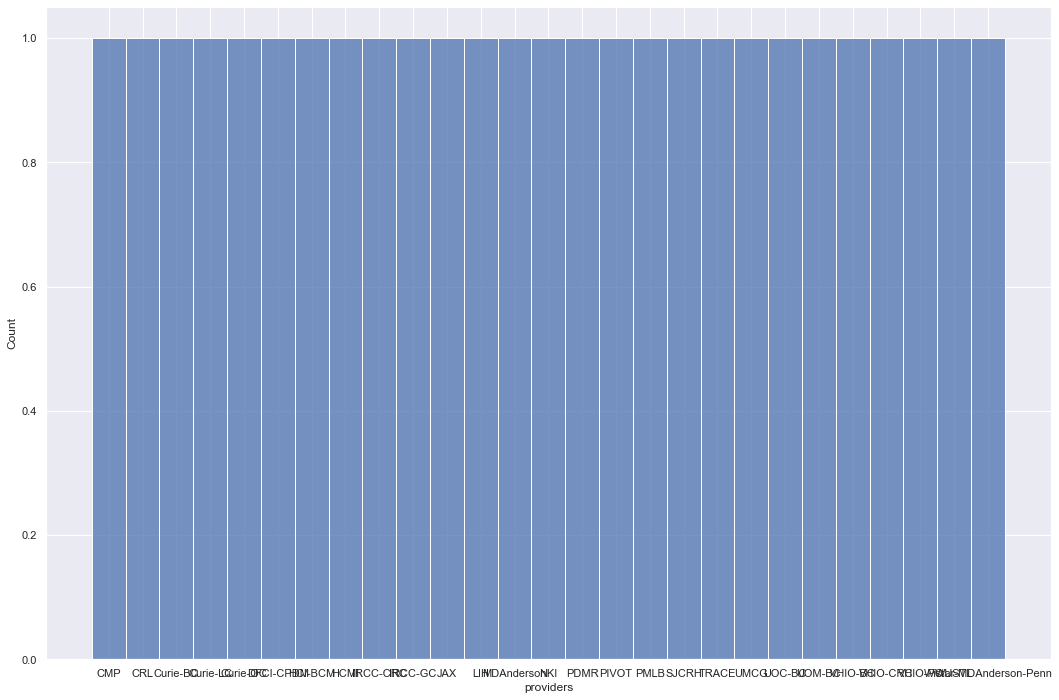

In [301]:
sns.set_theme()
sns.set(rc={'figure.figsize':(18,12)})
plot_data = 100 - return_percentage(5, count_list).iloc[:,0:7]
plot_data['providers'] = return_percentage(5, count_list).providers
sns.histplot(plot_data, x='providers', hue='')

In [314]:
sample = plot_data.transpose()
sample.columns = sample.iloc[7,:]
sample = sample.iloc[0:6,:]


[]

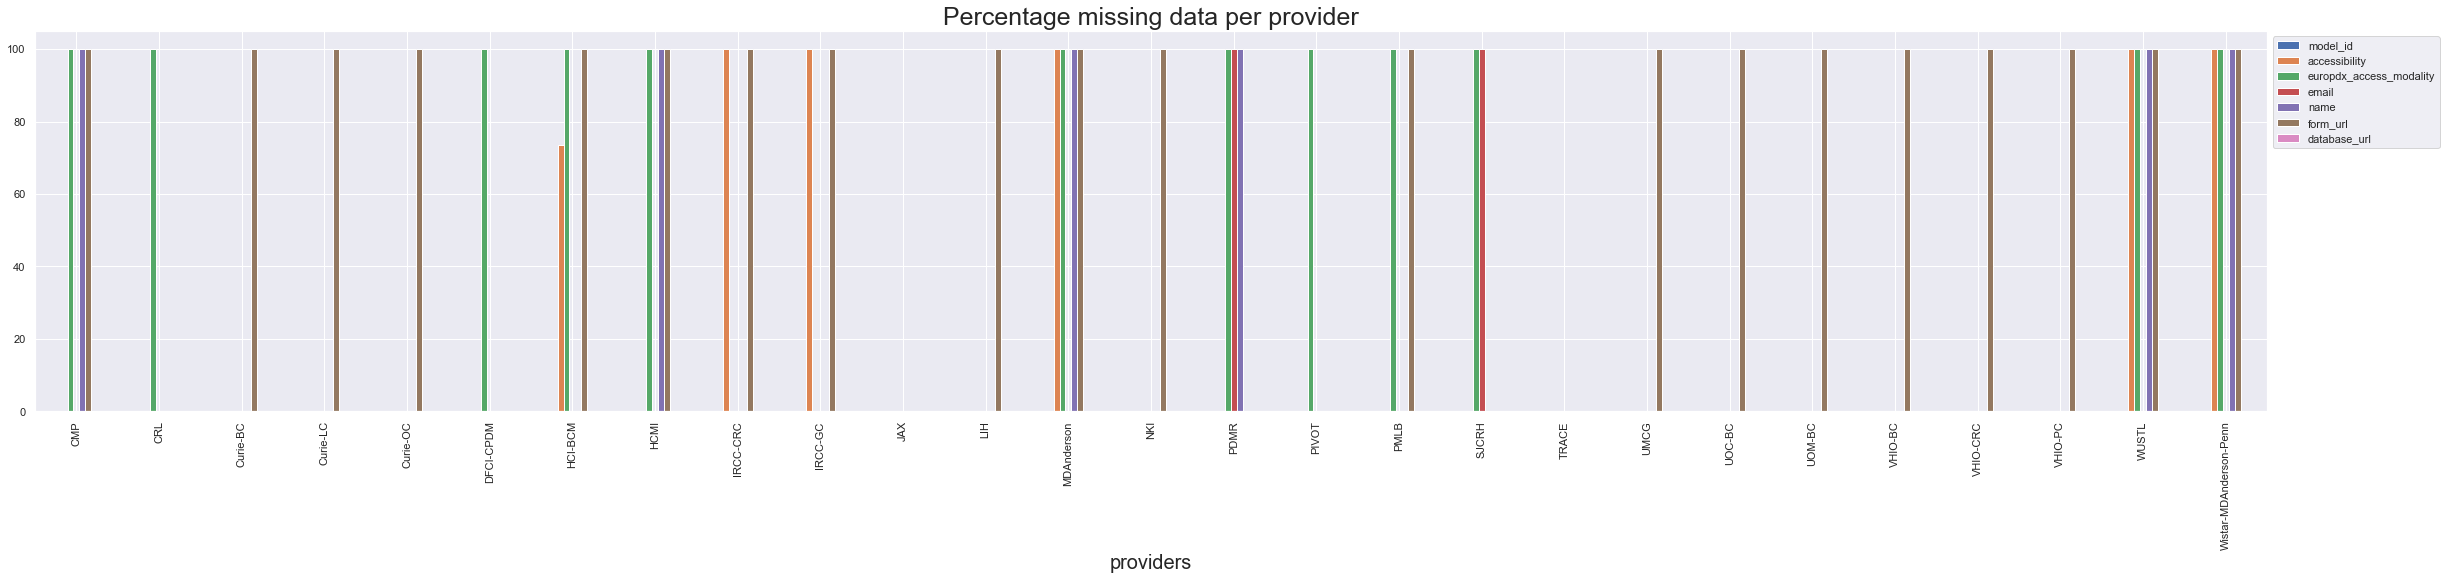

In [349]:
ax = plot_data.plot(x="providers", y=['model_id', 'accessibility', 'europdx_access_modality', 'email', 'name',
       'form_url', 'database_url'], kind='bar', figsize=(40,7))
ax.set_title("Percentage missing data per provider", fontsize=25)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
#ax.ylabel('Percentage', fontsize=20)
ax.legend(bbox_to_anchor=(1.0, 1.0))
map(lambda p: p.set_fontsize(500), ax.get_xticklabels())
map(lambda p: p.set_fontsize(500), ax.get_yticklabels())
ax.plot()

In [328]:
plot_data.columns

Index(['model_id', 'accessibility', 'europdx_access_modality', 'email', 'name',
       'form_url', 'database_url', 'providers'],
      dtype='object')

# Drug dosing data overview

In [10]:
drugdosing = pd.DataFrame()
for root, dirs, files in os.walk("/Users/tushar/CancerModels/pdxfinder-data/data/UPDOG/"):
    for file in files:
        if file.endswith("drugdosing-Sheet1.tsv"):
             data = pd.read_csv(os.path.join(root, file),sep='\t')
             if 'Field' in data.columns:
                 data = data.loc[data['Field'].astype(str).str.startswith('#') != True,].reset_index(drop=True)
                 data = data.drop('Field', axis=1)
             data['provider'] = file.replace('_drugdosing-Sheet1.tsv','')
             drugdosing = pd.concat([drugdosing, data])
drugdosing = drugdosing.fillna('')
drugdosing.treatment_response = drugdosing.treatment_response.str.lower()
drugdosing.to_csv("drugdosing-data_visual.csv", index=False)
drugdosing['treatment_dose_numerical'] = ""#drugdosing['treatment_dose'].str.replace(' mg/kg', '',regex=True, case=False)
sample = drugdosing[drugdosing.treatment_dose.str.contains('ml', na=False) == False]
#sample = sample[sample.treatment_dose_numerical != ""]
sample = sample[['model_id', 'treatment_name', 'treatment_dose', 'treatment_dose_numerical','treatment_response', 'administration_route', 'treatment_schedule', 'treatment_length', 'provider']].reset_index(drop=True)
sample.treatment_dose_numerical = sample.treatment_dose_numerical.str.split(',')
def str_to_num_average(x):
    num_list = [float(num) for num in x if num]
    return sum(num_list)/len(num_list) if num_list else 0
sample.treatment_dose_numerical = sample.treatment_dose_numerical.apply(str_to_num_average)
sample.administration_route = sample.administration_route.str.replace("oral, oral", "oral").str.replace("oral gavage", "oral")
#plot_data = sample[['model_id', 'treatment_name', 'treatment_response', 'treatment_dose_numerical', 'administration_route', 'provider']]
#plot_data

In [12]:
sample.treatment_name.unique()

array(['Fulvestrant', 'Olaparib', 'Niraparib', 'AZD5363',
       'AZD5363 + Fulvestrant', 'Everolimus', 'Palbociclib',
       'Palbociclib + Fulvestrant', 'AZD4547 + Fulvestrant',
       'Everolimus + Fulvestrant', 'Erdafitinib',
       'Erdatitinib + Fulvestrant', 'Paclitaxel', 'Enhertu', 'BYL719',
       'BYL719 + Fulvestrant', 'AZD4547', 'Selumetinib', 'Trametinib',
       'Adriamycine + Cyclophosphamide', 'Paclitaxel ', 'Carboplatine ',
       'Xeloda ', 'CPT11', 'Talazoparib ', 'Gedatolisib', 'Docetaxel',
       'Cisplatin', 'Dactolisib', 'Trabectedin', 'paclitaxel',
       'cyclophosphamide + doxorubicin', 'doxorubicin',
       'doxorubicin + cyclophosphamide', 'tamoxifen', 'trastuzumab',
       'Cisplatin + Paclitaxel', 'Paclitaxel + Cisplatin',
       'Pemetrexed + Cisplatin', '5FU', 'abraxane',
       'abraxane + gemcitabine', 'BGJ398', 'binimetinib',
       'binimetinib-3.5mpk', 'BKM120', 'BKM120 + binimetinib',
       'BKM120 + encorafenib', 'BKM120 + LDE225', 'BKM120 + LJC0

[Text(0.5, 0, 'Treatment Response'),
 Text(0, 0.5, 'Treatment dose (mg/Kg)'),
 Text(0.5, 1.0, 'Drug dosing data summary')]

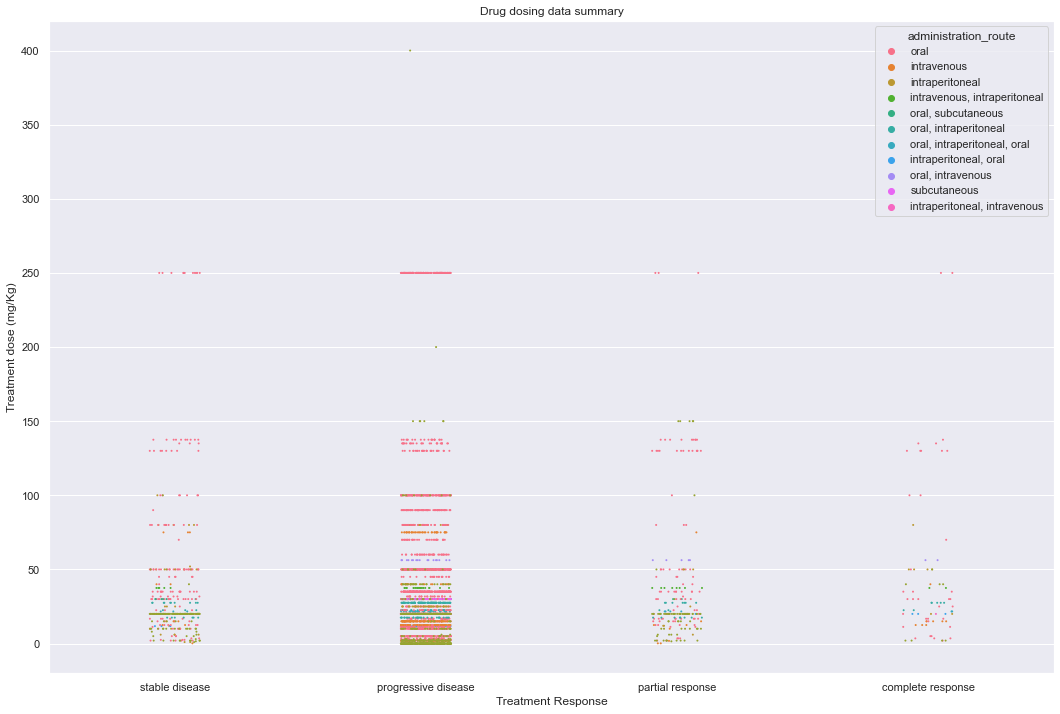

In [99]:
import seaborn as sns
# Apply the default theme
sns.set_theme()
sns.set(rc={'figure.figsize':(18,12)})
plot = sns.stripplot(data=plot_data, x="treatment_response", y="treatment_dose_numerical", hue="administration_route", legend=True, size=2)
plot.set(xlabel="Treatment Response", ylabel="Treatment dose (mg/Kg)",title='Drug dosing data summary')

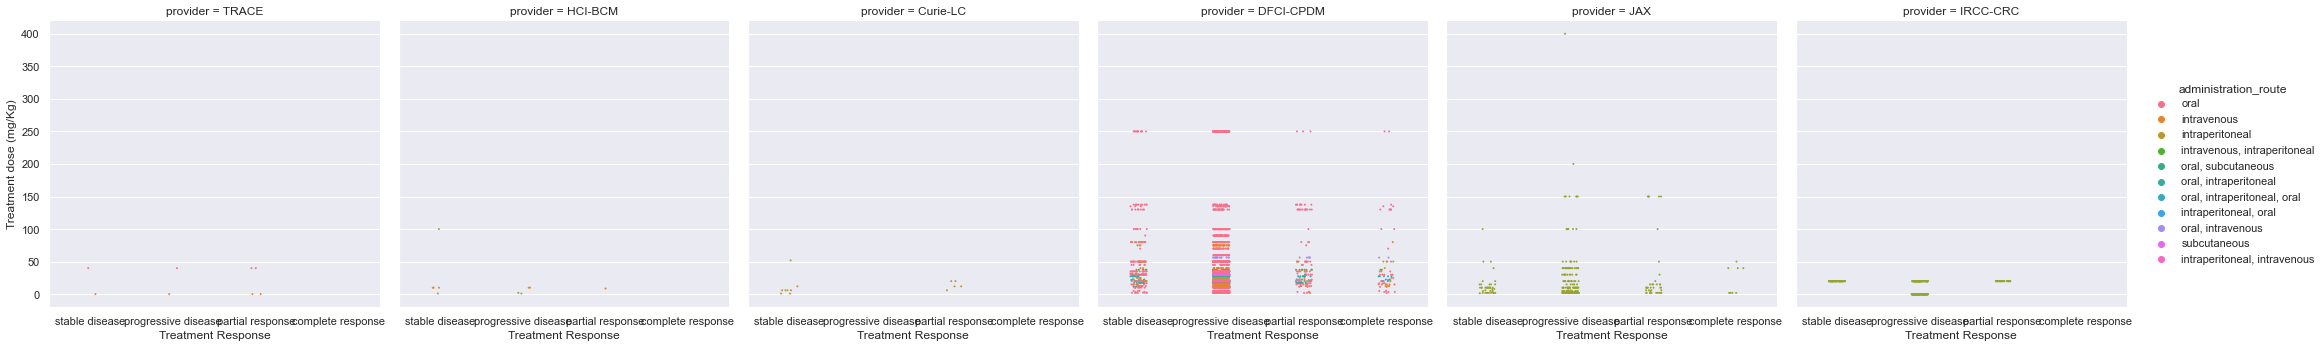

In [100]:
plot = sns.catplot(data=plot_data, x="treatment_response", y="treatment_dose_numerical", hue="administration_route", col='provider',legend=True, size=2)
plot.set(xlabel="Treatment Response", ylabel="Treatment dose (mg/Kg)")

<AxesSubplot:xlabel='count', ylabel='treatment_name'>

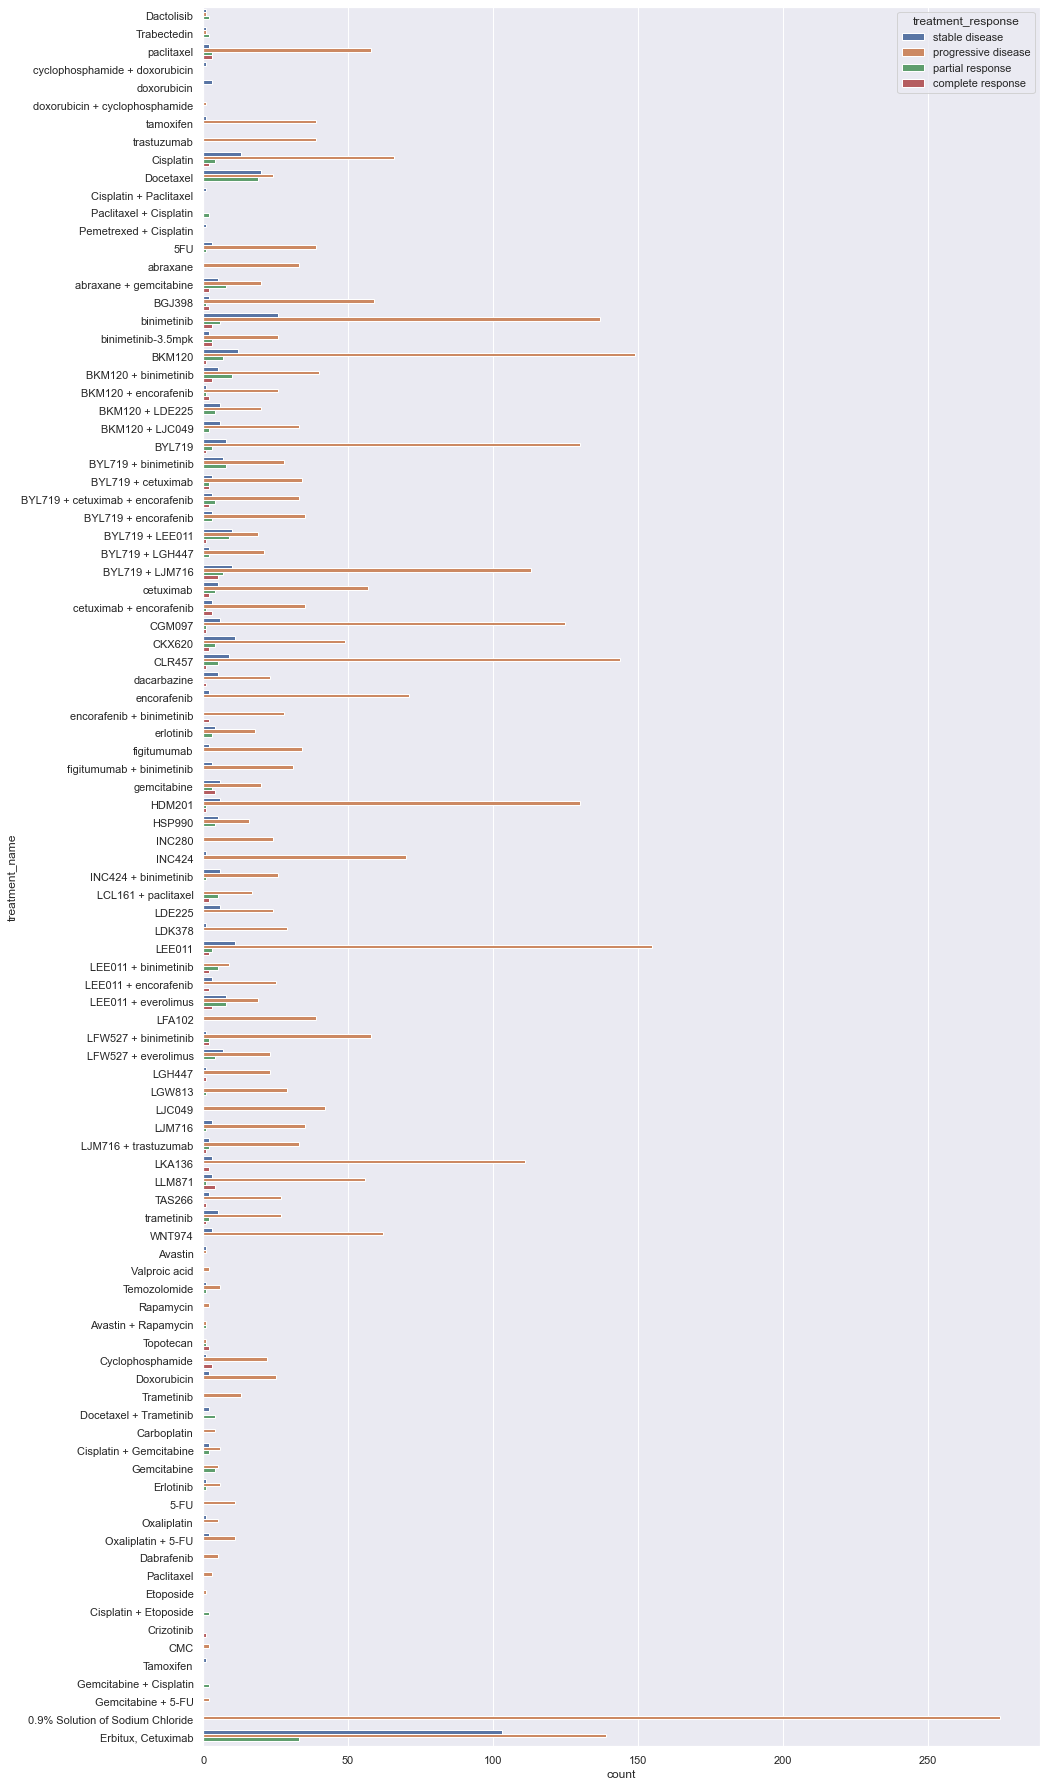

In [108]:
sns.set(rc={'figure.figsize':(15,32)})
#plot = sns.FacetGrid(plot_data, col = "provider", row = "treatment_name", margin_titles = True)
sns.countplot(plot_data, y="treatment_name", hue='treatment_response')
#plot.set(xlabel="Treatment Response", ylabel="Treatment dose (mg/Kg)")

# Treatment response data

In [14]:
treatment = pd.DataFrame()
for root, dirs, files in os.walk("/Users/tushar/CancerModels/pdxfinder-data/data/UPDOG/"):
    for file in files:
        if file.endswith("treatment-Sheet1.tsv"):
             data = pd.read_csv(os.path.join(root, file),sep='\t')
             if 'Field' in data.columns:
                 data = data.loc[data['Field'].astype(str).str.startswith('#') != True,].reset_index(drop=True)
                 data = data.drop('Field', axis=1)
             data['provider'] = file.replace('_patienttreatment-Sheet1.tsv','')
             treatment = pd.concat([treatment, data])
treatment = treatment.fillna('')
treatment

,patient_id,treatment_name,treatment_dose,treatment_starting_date,treatment_duration,treatment_event,elapsed_time,treatment_response,response_classification,model_id,provider
0,UOM_6_37,tamoxifen,Not provided,1995,60,,,progressive disease,Not provided,,UOM-BC
1,UOM_6_37,arimidex,Not provided,1995,60,,,progressive disease,Not provided,,UOM-BC
2,UOM_3_31,6 x FEC (5 fluorouracil+epirubicin+cyclophosph...,Not provided,01/04/1993,6,,,stable disease,Not provided,,UOM-BC
3,UOM_3_31,tamoxifen+iressa,Not provided,01/07/2005,18,,,partial response,Not provided,,UOM-BC
4,UOM_3_31,letrozole,Not provided,01/03/2007,19,,,progressive disease,Not provided,,UOM-BC
...,...,...,...,...,...,...,...,...,...,...,...
548,P0224,Cisplatin,,,,,,progressive disease,,OS-9,MDAnderson-CCH
549,P0224,MLN4924,,,,,,little/no response,,OS-9,MDAnderson-CCH
550,P0224,Bortezomib,,,,,,little/no response,,OS-9,MDAnderson-CCH
551,P0224,Trisenox(ATO),,,,,,little/no response,,OS-9,MDAnderson-CCH


In [17]:
sorted(treatment.treatment_name.unique())

['1 FEC100 + 2 FEC75 + 3Docetaxel75',
 '17-DMAG',
 '19D12',
 '1FEC100 + EC + Xgeva',
 '3FEC + Taxol',
 '3FEC100 + 3Docetaxel',
 '3FEC100 + 3TAC',
 '3FUN',
 '4 EC100 + Docetaxel',
 "4'-thio-2'-deoxycytidine (TdCyd)",
 '4AC',
 '4AC + 12Taxol',
 '4EC+ 1Docetaxel + 7FEC',
 '4FEC + 1Docetaxel + 9Taxol',
 '4FEC100',
 '4FEC100+ 2Docetaxel100',
 '4FUN',
 '4FUN + radiotherapy',
 '5-Azacytidine + Romidepsin',
 '5-FU+Cisplatin+docetaxel',
 '5-Fluorouracil',
 '5-Fluorouracil + Bevacizumab',
 '5-Fluorouracil + Bevacizumab + Leucovorin',
 '5-Fluorouracil + Cisplatin',
 '5-Fluorouracil + Cisplatin + Docetaxel',
 '5-Fluorouracil + Cisplatin + Epirubicin',
 '5-Fluorouracil + Epirubicin + Cyclophosphamide',
 '5-Fluorouracil + Leucovorin',
 '5-Fluorouracil + Leucovorin + nab-Paclitaxel',
 '5-Fluorouracil + Oxaliplatin',
 '5-fluorouracil topical',
 '6 x FEC (5 fluorouracil+epirubicin+cyclophosphamide',
 '6AC',
 '6FEC100',
 'ABT-199',
 'ABT-263',
 'AC + Taxol',
 'AMP-224',
 'AZD-2171',
 'AZD-6244',
 'AZD14

In [83]:
treatment.treatment_response.str.lower().unique()

array(['progressive disease', 'stable disease', 'partial response',
       'not provided', 'little/no response', 'good response',
       'complete response', '', 'not applicable', 'disease progression',
       'other', 'non-evaluable'], dtype=object)

In [84]:
treatment.treatment_dose.unique()

array(['Not provided', '6 cycles', '8 cycles', '', '55,06 Gy in total',
       '500 mg/m2 + 75 mg/m2 + 500 mg/m2', '50 Gy in total', '20mg/day',
       '175 mg/m2 + AUC=5', '90 mg/m2 + 600 mg/m2', '80mg/m2', '75 mg/m2',
       '57,26 Gy in total',
       '1000 mg/m2 weekly for 3 wk; every 4 wk for six cycles ',
       'Gemcitabine 1000 mg/m2 on days 1 and 15 plus cisplatin 50 mg/m2 on days 1 and 15; every 28 d',
       'Cisplatin, 50 mg/m2 on day 1, then De Gramont schedule on day 1-2: levofolic acid, 100 mg/m2 and 5-FU, 400 mg/m2 (bolus), at day 1 and 600 mg/m2 continuos infusion on day 1-2. All repeated every 2 weeks',
       'Cisplatin, 50 mg/m2 on day 1, then De Gramont schedule on day 1-2: levofolic acid, 100 mg/m2 and 5-FU, 400 mg/m2 (bolus), at day 1 and 600 mg/m2 continuos infusion on day 1-2. All repeated every 2 weeks. Reduced to 75%',
       'Gemcitabine 1000 mg/m2 weekly (7 of 8 wks in cycle 1, then 3 of 4 wks in subsequent cycles) and 60 mg pimasertib or placebo twice a da

# Mutation data
(could be done per model)

In [122]:
mut = pd.DataFrame()
for root, dirs, files in os.walk("/Users/tushar/pdx/pdxfinder-data/data/UPDOG/"):
    for file in files:
        if file.endswith("mut.tsv"):
             data = pd.read_csv(os.path.join(root, file),sep='\t')
             if 'Field' in data.columns:
                 data = data.loc[data['Field'].astype(str).str.startswith('#') != True,].reset_index(drop=True)
                 data = data.drop('Field', axis=1)
             data['provider'] = file.replace('_mut.tsv','')
             mut = mut.append(data)
mut = mut.fillna('')
mut_plot_data = mut[['sample_id', 'provider', 'symbol', 'coding_sequence_change', 'variant_class', 'consequence', 'read_depth', 'allele_frequency', 'chromosome', 'seq_start_position', 'strand', 'ref_allele', 'alt_allele']]
mut_plot_data = mut_plot_data[mut_plot_data.ref_allele!='']
mut_plot_data['seq_end_position'] = mut_plot_data.apply(lambda x: x.loc['seq_start_position'] + len(x.loc['alt_allele']),axis=1)
mut_plot_data

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,sample_id,provider,symbol,coding_sequence_change,variant_class,consequence,read_depth,allele_frequency,chromosome,seq_start_position,strand,ref_allele,alt_allele
0,DAC11_M2.2L,UOM-BC,FGFR3,1364A>G,SNV,missense_variant,3048.0,0.42782,4,1804915.0,,A,G
1,DAC11_M2.2L,UOM-BC,PDGFRA,661C>T,SNV,missense_variant,328.0,0.625,4,54264951.0,,C,T
2,DAC11_M2.2L,UOM-BC,RASA1,64G>T,SNV,missense_variant,472.0,0.65042,5,87268515.0,,G,T
3,DAC11_M2.2L,UOM-BC,APC,6446A>C,SNV,missense_variant,166.0,0.34337,5,112842040.0,,A,C
4,DAC11_M2.2L,UOM-BC,APC,7628G>T,SNV,missense_variant,181.0,0.36464,5,112843222.0,,G,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26138,CRC1359LMX0A01001TUMD02000,IRCC-CRC,EP400,8422A>G,SNV,missense_variant,,0.99,12,132064755.0,,A,G
26139,CRC1369LMX0B01001TUMD02000,IRCC-CRC,SMAD4,1236del,deletion,frameshift_variant,,1.0,18,51067114.0,,AC,A
26140,CRC1369LMX0B01001TUMD02000,IRCC-CRC,MSH6,431G>T,SNV,missense_variant,,0.34,2,47791097.0,,G,T
26141,CRC1369LMX0B01001TUMD02000,IRCC-CRC,APC,1495C>T,SNV,stop_gained,,0.99,5,112827194.0,,C,T


In [145]:
mut_plot_data.to_csv('mut_data.tsv',  sep='\t', index=False)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 43026, saw 2


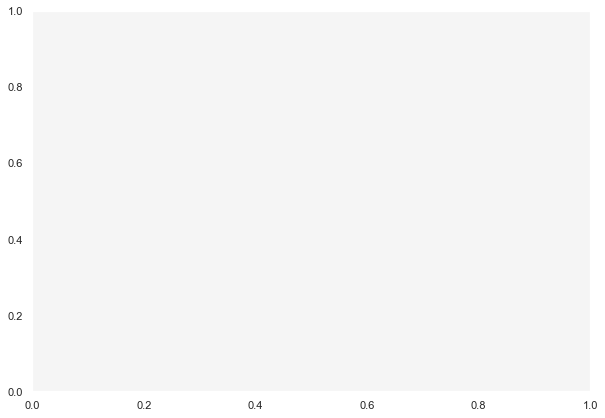

In [147]:
import karyopype.karyopype as kp
kp.plot_karyopype('hg38', 'mut_data.tsv')

In [16]:
from pycirclize import Circos
from pycirclize.utils import ColorCycler, load_eukaryote_example_dataset
import numpy as np

In [18]:
# Load hg38 dataset (https://github.com/moshi4/pycirclize-data/tree/main/eukaryote/hg38)
chr_bed_file, cytoband_file, chr_links = load_eukaryote_example_dataset("hg38")

# Initialize Circos from BED chromosomes
circos = Circos.initialize_from_bed(chr_bed_file, space=3)
circos.text("Homo sapiens\n(hg38)", deg=315, r=150, size=12)

# Add cytoband tracks from cytoband file
circos.add_cytoband_tracks((95, 100), cytoband_file)

# Create chromosome color mapping
ColorCycler.set_cmap("hsv") 
chr_names = [s.name for s in circos.sectors]
colors = ColorCycler.get_color_list(len(chr_names))
chr_name2color = {name: color for name, color in zip(chr_names, colors)}

# Plot chromosome name & xticks
for sector in circos.sectors:
    sector.text(sector.name, r=120, size=10, color=chr_name2color[sector.name])
    sector.get_track("cytoband").xticks_by_interval(
        40000000,
        label_size=8,
        label_orientation="vertical",
        label_formatter=lambda v: f"{v / 1000000:.0f} Mb",
    )




In [25]:
circos.sectors[0].name

'chr1'

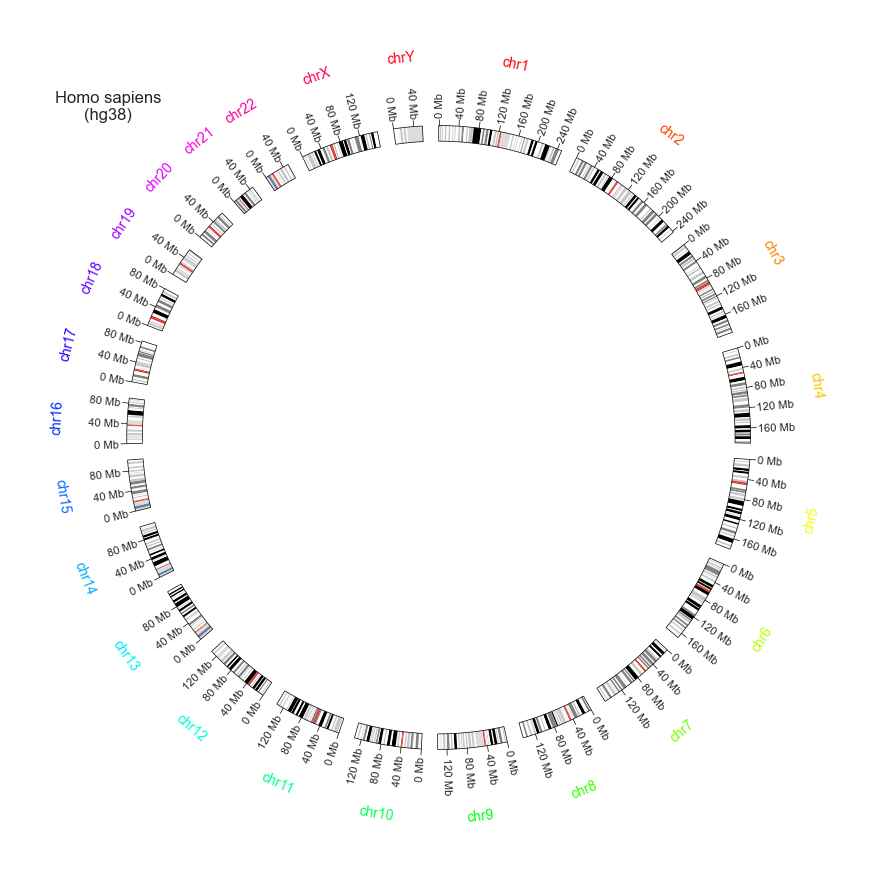

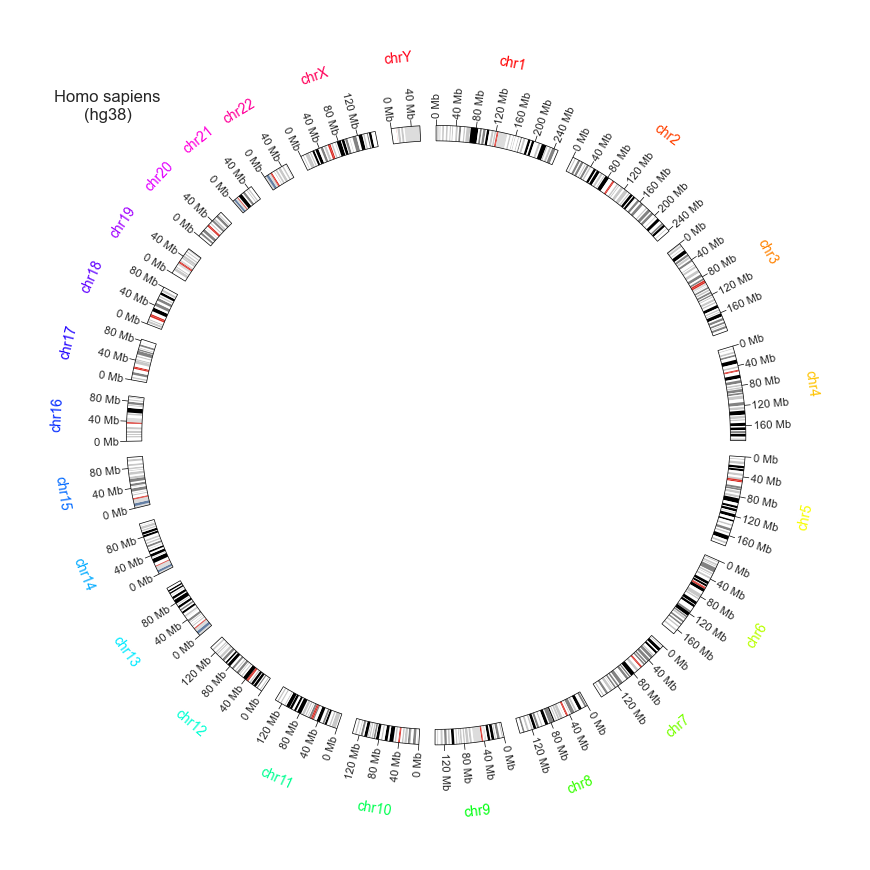

In [19]:
circos.plotfig()

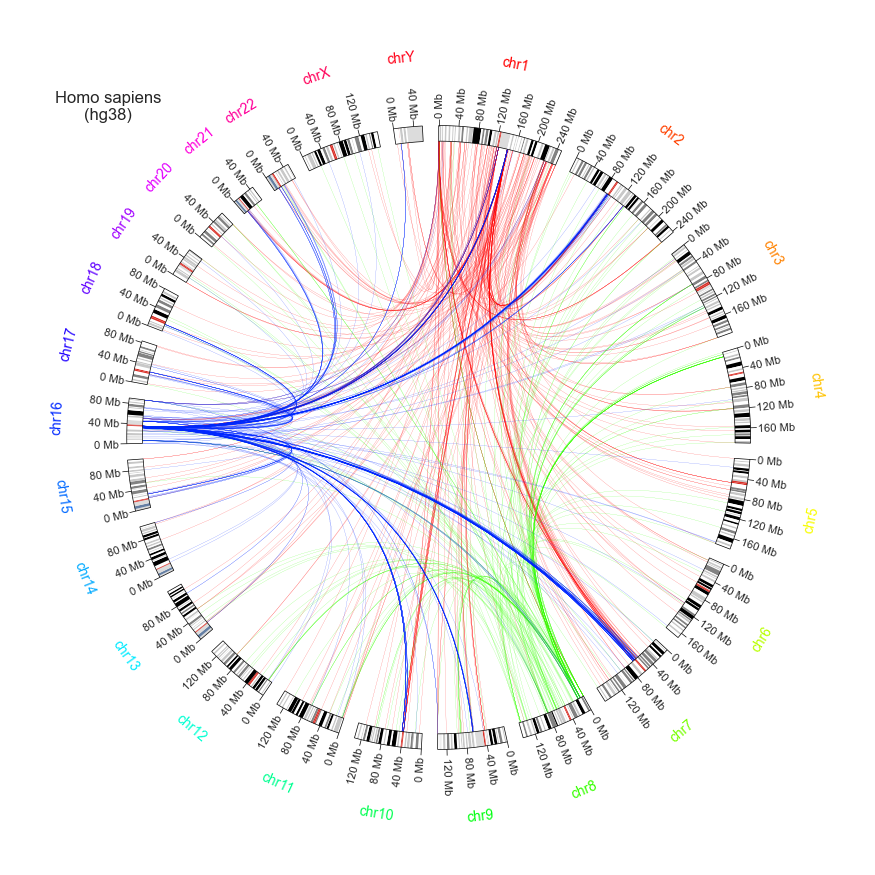

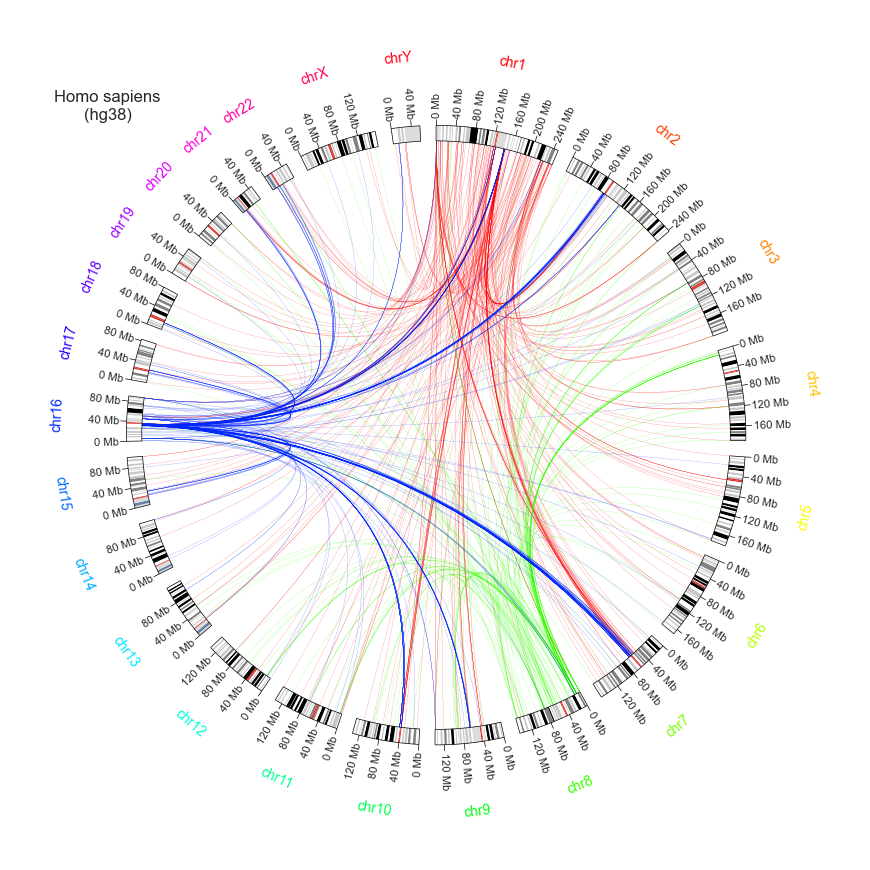

In [14]:
circos.plotfig()

In [33]:
def process_model_type(data):
    data['model_type'] = ['Organoid' if str(t).lower().__contains__('organoid') else t for t in data['model_type']]
    data['model_type'] = [
        'Cell Line' if str(t).lower().__contains__('cell') or str(t).lower().__contains__('pdc') or str(
            t).lower().__contains__('2d') or str(t).lower().__contains__('2-d') else t for t in data['model_type']]
    data['model_type'] = [
        'Other' if str(t).lower().__contains__('other') or str(t).lower().__contains__('mixed') else t for t in
        data['model_type']]
    return data

v3 = process_model_type(pd.read_csv("/Users/tushar/CancerModels/utils/data-dashboard/assets/model/total_models_DR_v3.0.csv"))
v3['model_type'].fillna('PDX', inplace=True)
v6 = process_model_type(pd.read_csv("/Users/tushar/CancerModels/utils/data-dashboard/assets/model/total_models_DR_v6.0.csv"))

In [37]:
v3.groupby(['model_type', 'provider']).count()['model_id']

model_type  provider              
Cell Line   BROD                        50
            CMP                       1509
            PDMR                       223
Organoid    BROD                        23
            CMP                         37
            CSHL                        54
            PDMR                       227
            SANG                        25
Other       BROD                        18
PDX         CCIA                        90
            CHOP                        35
            CRL                        540
            Curie-BC                     5
            Curie-LC                     6
            Curie-OC                     5
            DFCI-CPDM                  735
            GCCRI                       81
            HCI-BCM                     67
            IRCC-CRC                   639
            IRCC-GC                     76
            JAX                        427
            LIH                         40
            LurieCh